In [19]:
from src.MOO.moo_initialization import *
from src.MOO.load_data_moo import load_data, load_output
from src.MOO.moo_structures import Individual, Problem
from src.MOO.moo_operators import *
from src.MOO.moo_evolution_algorithm import run_nsga2

In [20]:
import numpy as np

In [ ]:
data = load_data('dataset/hustack/input/10.txt')
best_solution = load_output('dataset/hustack/input/10.txt', 'dataset/hustack/output/10-bestSolution.txt')

In [22]:
problem = Problem(num_request=data[0],
                  request=data[1], 
                  time_matrix=np.array(data[2]))

In [23]:
cal_moo_fitness([best_solution])

In [24]:
print("---> Fittest individual: ", best_solution.fitness)
print("-----Corresponding to the best individual-----")
print("---> Route:",  best_solution.route)

# Index 3: Total time (Scalar)
print("---> Total service time: ", best_solution.route_computing[3]) 

print("---> Total travel time: ", sum(best_solution.route_computing[0])) 
# Index 4: Lateness (List) -> dùng để đếm số lần vi phạm
print("Number of time window violations: ", sum(1 for x in best_solution.route_computing[4] if x != 0.0))

# Index 5: Total Lateness (Scalar)
print("Total time of late arrivals: ", best_solution.route_computing[5])

# Index 6: Wait (List) -> dùng để đếm số lần đến sớm
print("Number of arrivals ealier than opening time: ", sum(1 for x in best_solution.route_computing[6] if x != 0))

# Index 7: Total Wait (Scalar)
print("Total time of arrivals ealier than opening time:", best_solution.route_computing[7])

---> Fittest individual:  (np.int64(55140), np.float64(570.0))
-----Corresponding to the best individual-----
---> Route: [1, 18, 92, 88, 48, 69, 24, 73, 9, 33, 39, 61, 60, 32, 19, 95, 23, 28, 79, 81, 89, 25, 38, 7, 47, 26, 15, 99, 55, 76, 5, 41, 37, 6, 72, 36, 31, 30, 3, 64, 86, 42, 80, 67, 35, 46, 57, 75, 49, 2, 16, 14, 97, 85, 29, 56, 98, 100, 62, 87, 52, 51, 11, 71, 65, 21, 44, 74, 70, 53, 20, 4, 54, 82, 50, 84, 17, 78, 12, 8, 10, 96, 83, 27, 59, 13, 45, 40, 22, 90, 58, 63, 93, 94, 68, 43, 34, 66, 91, 77]
---> Total service time:  57815
---> Total travel time:  55140
Number of time window violations:  0
Total time of late arrivals:  0.0
Number of arrivals ealier than opening time:  71
Total time of arrivals ealier than opening time: 285.0


In [25]:
# gen_type = 'random'
# gen_type = 'greedy'
pop_size = 100
c_rate = 0.8
m_rate = 0.2
generations = 500
maximum_loop =150

In [26]:
params ={
    "cmethod": 'ox', # ox, pmx, cx
    "mmethod": 'swap', # inversion, swap, scramble
    "tourn_s_parameter": 2, # dùng cho tournament trong select_parents
    
    "gen_type": 'greedy', # loại khởi tạo greedy
    "greedy_rate": 0.5, # tỉ lệ các cá thể được khởi tạo greedy trong quần thể ban đầu
    "search_size": 2, # số lượng hàng xóm xét tại mỗi điểm đang đứng mà sẽ lựa chọn một trong số chúng để đến trong lộ trình tham lam
    # "imp_type": 'first_improvement',
    # "ls_rate" : 0.1
}

In [27]:
# last_pop = run_nsga2(problem, pop_size, c_rate, m_rate, generations, maximum_loop, **params)


In [28]:
import matplotlib.pyplot as plt 

Running NSGA-II...
Starting NSGA-II for Multi-Objective Optimization...
Initial fitness (Best Obj 1): 11640
Gen: 0 | Pareto size: 15 | Min Travel Time: 11640 | Min Violation: 3024666.0
Gen: 20 | Pareto size: 19 | Min Travel Time: 11640 | Min Violation: 2128096.0
Gen: 40 | Pareto size: 22 | Min Travel Time: 11550 | Min Violation: 2128096.0
Gen: 60 | Pareto size: 22 | Min Travel Time: 11550 | Min Violation: 2128096.0
Gen: 80 | Pareto size: 24 | Min Travel Time: 11550 | Min Violation: 2128096.0
Gen: 100 | Pareto size: 24 | Min Travel Time: 11550 | Min Violation: 2128096.0
Gen: 120 | Pareto size: 25 | Min Travel Time: 11550 | Min Violation: 2128096.0
Gen: 140 | Pareto size: 27 | Min Travel Time: 11550 | Min Violation: 2128096.0
Gen: 160 | Pareto size: 27 | Min Travel Time: 11550 | Min Violation: 2128096.0
Gen: 180 | Pareto size: 27 | Min Travel Time: 11550 | Min Violation: 2128096.0
Gen: 200 | Pareto size: 28 | Min Travel Time: 11550 | Min Violation: 2128096.0
Gen: 220 | Pareto size: 29 | 

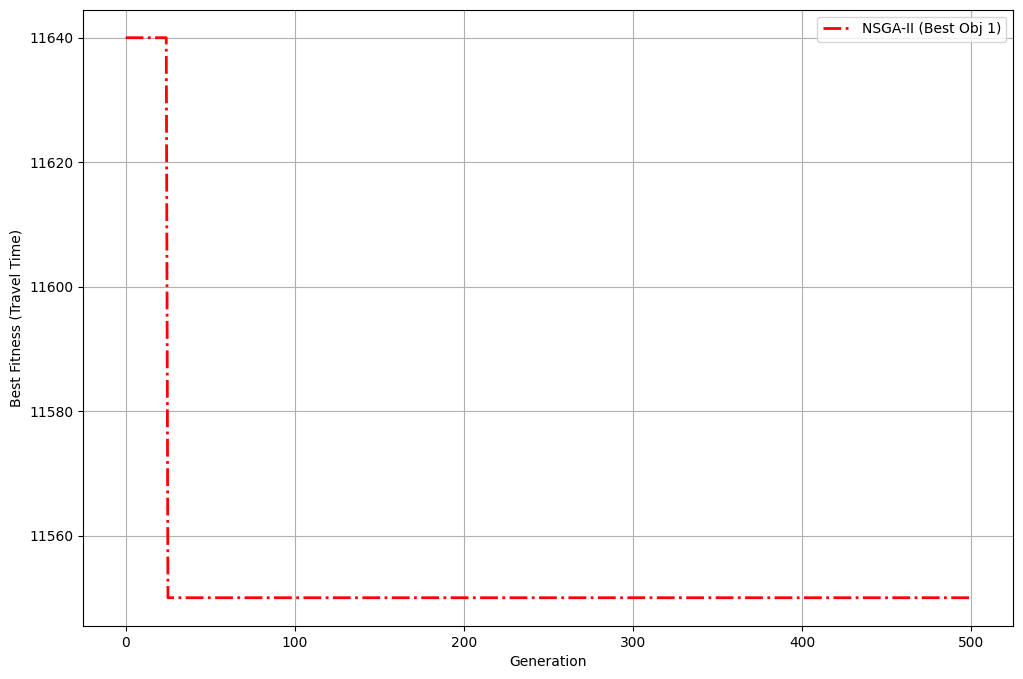

In [29]:
plt.figure(figsize=(12, 8))
print("Running NSGA-II...")
pop_nsga, progress_nsga = run_nsga2(problem, pop_size, c_rate, m_rate, generations, maximum_loop, **params)
plt.plot(progress_nsga, label='NSGA-II (Best Obj 1)', color='red', linewidth=2, linestyle='-.')
# plt.title('Comparison of Algorithms Convergence')
plt.xlabel('Generation')
plt.ylabel('Best Fitness (Travel Time)')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
# plt.plot(progress_nsga, label='NSGA-II (Best Obj 1)', color='red', linewidth=2, linestyle='-.')

In [31]:
for i, indi in enumerate(pop_nsga):
    print(i, indi.fitness[0], indi.fitness[1], indi.route_computing[5], indi.route_computing[7])

0 49580 2128096.0 527064.0 9920.0
1 11550 12602672.0 3123348.0 54640.0
2 36820 3918834.0 966766.0 25885.0
3 29490 5404914.0 1334556.0 33345.0
4 12330 10977246.0 2717154.0 54315.0
5 15420 9141292.0 2260453.0 49740.0
6 34090 4867990.0 1202810.0 28375.0
7 29020 5966956.0 1474354.0 34770.0
8 11770 12556986.0 3112166.0 54161.0
9 20820 9135918.0 2262508.0 42943.0
10 25570 6226910.0 1538885.0 35685.0
11 41550 3863882.0 955369.0 21203.0
12 34870 4608862.0 1138413.0 27605.0
13 24160 7165588.0 1772107.0 38580.0
14 24900 6577978.0 1625502.0 37985.0
15 23230 7477010.0 1849082.0 40341.0
16 47420 2459818.0 607772.0 14365.0
17 22290 8661610.0 2142477.0 45851.0
18 13450 10332718.0 2557967.0 50425.0
19 13830 9393206.0 2323599.0 49405.0
20 43790 3655916.0 904649.0 18660.0
21 44120 3370186.0 832624.0 19845.0
22 12940 10389620.0 2570894.0 53022.0
23 21200 8957164.0 2216576.0 45430.0
24 44720 2818698.0 696107.0 17135.0
25 22810 8100682.0 2005503.0 39335.0
26 47190 2793972.0 691123.0 14740.0
27 44530 288513

In [33]:
best_indi = min(pop_nsga, key = lambda x: x.fitness[1])
print(best_indi.fitness[0])
print(best_indi.route)

49580
[1, 18, 88, 48, 24, 73, 9, 33, 39, 60, 19, 95, 23, 28, 81, 89, 25, 38, 47, 26, 15, 99, 55, 5, 41, 37, 72, 36, 31, 3, 64, 42, 80, 67, 35, 46, 57, 49, 16, 14, 85, 29, 69, 61, 32, 7, 76, 6, 30, 86, 75, 2, 56, 100, 87, 52, 11, 65, 21, 44, 70, 20, 54, 82, 50, 84, 17, 12, 10, 83, 27, 13, 40, 22, 90, 63, 94, 68, 43, 66, 77, 53, 97, 93, 62, 79, 98, 74, 78, 91, 96, 45, 4, 58, 92, 34, 8, 59, 51, 71]
